In [32]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [34]:
import plotly.graph_objs as go

In [35]:
df=pd.read_csv(r"tesla1.csv") #dataset

In [36]:
df.shape

(2060, 7)

In [37]:
print("number of rows",df.shape[0])
print("number of columns",df.shape[1])

number of rows 2060
number of columns 7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2060 non-null   object 
 1   Open       2060 non-null   float64
 2   High       2060 non-null   float64
 3   Low        2060 non-null   float64
 4   Close      2060 non-null   float64
 5   Adj Close  2060 non-null   float64
 6   Volume     2060 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 112.8+ KB


In [38]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2.060000e+03
mean,185.393534,188.603929,181.993898,185.393631,185.393631,5.302507e+06
std,112.433201,114.169679,110.554571,112.427018,112.427018,4.552553e+06
min,21.780001,22.270000,21.110001,21.830000,21.830000,2.396000e+05
25%,35.847500,36.365000,34.957500,35.957500,35.957500,1.978575e+06
50%,210.414993,214.319999,206.825005,210.089996,210.089996,4.395650e+06
75%,266.330010,270.927513,262.019997,266.702492,266.702492,7.023575e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [39]:
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2014,26.660000,26.950001,26.020000,26.670000,26.670000,1187400
1,05-01-2014,26.480000,26.900000,26.190001,26.830000,26.830000,1446700
2,06-01-2014,26.830000,28.000000,26.809999,27.879999,27.879999,2061200
3,07-01-2014,28.000000,28.580000,27.900000,28.240000,28.240000,2247900
4,10-01-2014,28.170000,28.680000,28.049999,28.450001,28.450001,1342700
...,...,...,...,...,...,...,...
95,20-05-2014,28.260000,28.280001,27.350000,27.969999,27.969999,842500
96,23-05-2014,27.620001,27.620001,26.620001,26.820000,26.820000,863600
97,24-05-2014,27.020000,27.500000,26.600000,26.719999,26.719999,613700
98,25-05-2014,26.900000,29.010000,26.170000,28.980000,28.980000,4693100


In [40]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_10088\3023999556.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [41]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days={(df.Date.max()-df.Date.min()).days}days')

Dataframe contains stock prices between 2014-01-02 00:00:00 2022-12-03 00:00:00
Total days=3257days


In [42]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2.060000e+03
mean,185.393534,188.603929,181.993898,185.393631,185.393631,5.302507e+06
std,112.433201,114.169679,110.554571,112.427018,112.427018,4.552553e+06
min,21.780001,22.270000,21.110001,21.830000,21.830000,2.396000e+05
25%,35.847500,36.365000,34.957500,35.957500,35.957500,1.978575e+06
50%,210.414993,214.319999,206.825005,210.089996,210.089996,4.395650e+06
75%,266.330010,270.927513,262.019997,266.702492,266.702492,7.023575e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

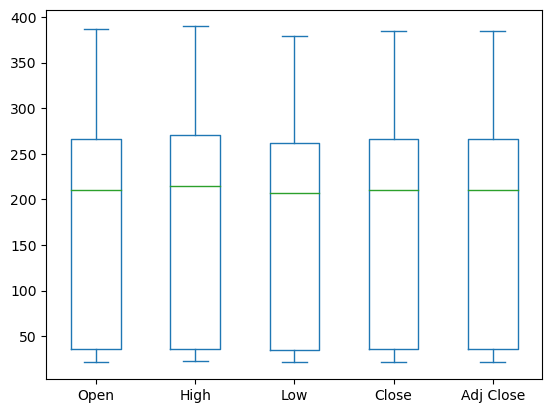

In [43]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [44]:
# here setting the layout for our plot
layout=go.Layout(
   title='stock prices of Tesla',
    xaxis=dict(
         title='Date',
          titlefont=dict(
                family='Courier new,monospace',
                size=18,
                 color='#7f7f7f'
          )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
              family='Courier New, monospace',
              size=18,
              color='#7f7f7f'
        )
    )
)
df1=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=df1,layout=layout)

In [45]:
#plot
#plotting offline
iplot(plot)

In [46]:
#now use linear regression model
#building the regression model

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [64]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
#split the data into train and test sets
X=np.array(df.index).reshape(-1,1)
Y=df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [48]:
#feature scaling
scaler=StandardScaler().fit(X_train)

# first prediction using Linear Regression Model

In [49]:
#use linear regression model
from sklearn.linear_model import LinearRegression

In [50]:
#create linear regression model
lm= LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [51]:
#plot actual and predicted values for train dataset
trace0=go.Scatter(
     x=X_train.T[0],
     y=Y_train,
     mode='markers',
     name='Actual'
)
trace1=go.Scatter(
     x=X_train.T[0],
     y=lm.predict(X_train).T,
     mode='lines',
     name='Predicted'
)
df1=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=df1,layout=layout)

In [52]:
iplot(plot2)

# calculating % of prediction

In [53]:
#calculate score for prediction
score=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(score)


Metric           Train                Test        
r2_score  0.853372778500312	0.8457713041941517
MSE       1860.7075157462866	1927.1783468897124



# i.e 84% accuracy


# Now Use LSTM model





In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [76]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 566.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:
data=pd.read_csv(r"tesla1.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2014,26.66,26.950001,26.020000,26.670000,26.670000,1187400
1,05-01-2014,26.48,26.900000,26.190001,26.830000,26.830000,1446700
2,06-01-2014,26.83,28.000000,26.809999,27.879999,27.879999,2061200
3,07-01-2014,28.00,28.580000,27.900000,28.240000,28.240000,2247900
4,10-01-2014,28.17,28.680000,28.049999,28.450001,28.450001,1342700


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2060 non-null   object 
 1   Open       2060 non-null   float64
 2   High       2060 non-null   float64
 3   Low        2060 non-null   float64
 4   Close      2060 non-null   float64
 5   Adj Close  2060 non-null   float64
 6   Volume     2060 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 112.8+ KB


In [27]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2060 non-null   object 
 1   Open       2060 non-null   float64
 2   High       2060 non-null   float64
 3   Low        2060 non-null   float64
 4   Close      2060 non-null   float64
 5   Adj Close  2060 non-null   float64
 6   Volume     2060 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 112.8+ KB


In [29]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(2060, 1)

In [30]:
X_train=[]
y_train=[]

for i in range(60,2060):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
    
X_train,y_train=np.array(X_train),np.array(y_train)

In [31]:
#adding batch size axis
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2000, 60, 1)

In [32]:
model=Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [33]:
hist= model.fit(X_train, y_train, epochs=20, batch_size= 32, verbose=2)

Epoch 1/20
63/63 - 32s - loss: 0.0194 - 32s/epoch - 504ms/step
Epoch 2/20
63/63 - 18s - loss: 0.0045 - 18s/epoch - 281ms/step
Epoch 3/20
63/63 - 17s - loss: 0.0039 - 17s/epoch - 266ms/step
Epoch 4/20
63/63 - 17s - loss: 0.0040 - 17s/epoch - 263ms/step
Epoch 5/20
63/63 - 18s - loss: 0.0040 - 18s/epoch - 280ms/step
Epoch 6/20
63/63 - 18s - loss: 0.0047 - 18s/epoch - 278ms/step
Epoch 7/20
63/63 - 18s - loss: 0.0034 - 18s/epoch - 278ms/step
Epoch 8/20
63/63 - 17s - loss: 0.0031 - 17s/epoch - 268ms/step
Epoch 9/20
63/63 - 18s - loss: 0.0037 - 18s/epoch - 287ms/step
Epoch 10/20
63/63 - 18s - loss: 0.0031 - 18s/epoch - 286ms/step
Epoch 11/20
63/63 - 19s - loss: 0.0029 - 19s/epoch - 297ms/step
Epoch 12/20
63/63 - 18s - loss: 0.0029 - 18s/epoch - 290ms/step
Epoch 13/20
63/63 - 19s - loss: 0.0027 - 19s/epoch - 295ms/step
Epoch 14/20
63/63 - 18s - loss: 0.0025 - 18s/epoch - 291ms/step
Epoch 15/20
63/63 - 19s - loss: 0.0030 - 19s/epoch - 294ms/step
Epoch 16/20
63/63 - 19s - loss: 0.0026 - 19s/epoc

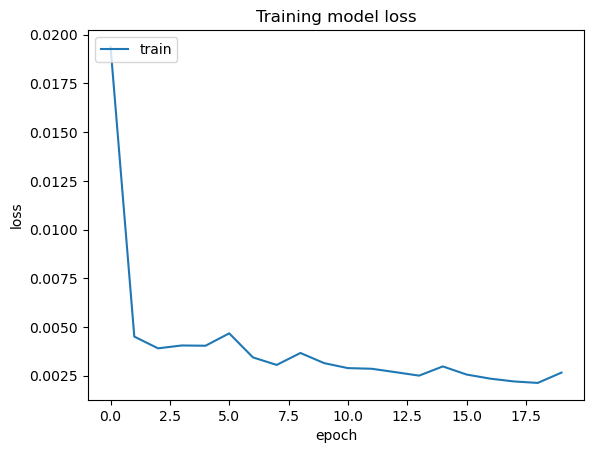

In [34]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [35]:
testData=pd.read_csv(r"tesla1.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData= testData.dropna()
testData= testData.iloc[:,4:5]
y_test= testData.iloc[60:,0:].values

inputClosing= testData.iloc[:,0:].values
inputClosing_scaled= sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length= len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(2000, 60, 1)

In [36]:
y_pred=model.predict(X_test)
y_pred

63/63 [==============================] - 8s 88ms/step


array([[-0.00350475],
       [-0.00267412],
       [-0.00131416],
       ...,
       [ 0.7276208 ],
       [ 0.72977805],
       [ 0.73497903]], dtype=float32)

In [37]:
predicted_price=sc.inverse_transform(y_pred)

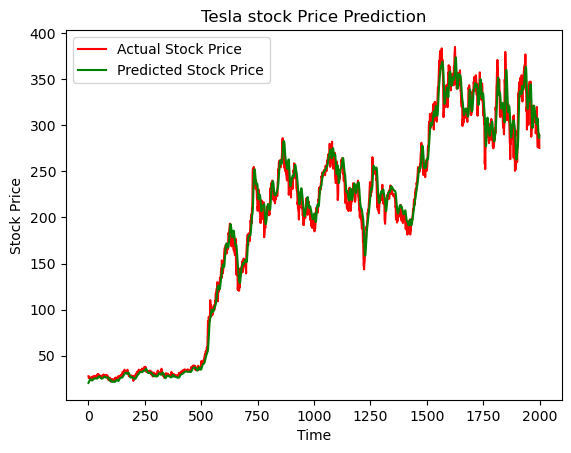

In [38]:
plt.plot(y_test,color='red', label='Actual Stock Price')
plt.plot(predicted_price,color='green', label='Predicted Stock Price')
plt.title('Tesla stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# now prediction using logistic regression Algorithm

In [128]:
import pandas as pd

In [129]:
import statsmodels.api as sm

In [130]:
data=pd.read_csv(r"tesla1.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2014,26.66,26.950001,26.020000,26.670000,26.670000,1187400
1,05-01-2014,26.48,26.900000,26.190001,26.830000,26.830000,1446700
2,06-01-2014,26.83,28.000000,26.809999,27.879999,27.879999,2061200
3,07-01-2014,28.00,28.580000,27.900000,28.240000,28.240000,2247900
4,10-01-2014,28.17,28.680000,28.049999,28.450001,28.450001,1342700


In [131]:
df=data['Adj Close'].pct_change() * 100

In [132]:
df

0            NaN
1       0.599925
2       3.913526
3       1.291252
4       0.743630
          ...   
2055    2.386147
2056   -2.598662
2057    1.976287
2058    0.346069
2059   -5.011035
Name: Adj Close, Length: 2060, dtype: float64

In [133]:
df= df.rename("Today")
df

0            NaN
1       0.599925
2       3.913526
3       1.291252
4       0.743630
          ...   
2055    2.386147
2056   -2.598662
2057    1.976287
2058    0.346069
2059   -5.011035
Name: Today, Length: 2060, dtype: float64

In [134]:
df=df.reset_index()
df

,index,Today
0,0,NaN
1,1,0.599925
2,2,3.913526
3,3,1.291252
4,4,0.743630
...,...,...
2055,2055,2.386147
2056,2056,-2.598662
2057,2057,1.976287
2058,2058,0.346069


In [135]:
for i in range(1,6):
    df['Lag'+str(i)]= df['Today'].shift(i)

In [136]:
df

,index,Today,Lag1,Lag2,Lag3,Lag4,Lag5
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.599925,NaN,NaN,NaN,NaN,NaN
2,2,3.913526,0.599925,NaN,NaN,NaN,NaN
3,3,1.291252,3.913526,0.599925,NaN,NaN,NaN
4,4,0.743630,1.291252,3.913526,0.599925,NaN,NaN
...,...,...,...,...,...,...,...
2055,2055,2.386147,2.729679,0.126704,-0.108490,-3.090824,-3.198895
2056,2056,-2.598662,2.386147,2.729679,0.126704,-0.108490,-3.090824
2057,2057,1.976287,-2.598662,2.386147,2.729679,0.126704,-0.108490
2058,2058,0.346069,1.976287,-2.598662,2.386147,2.729679,0.126704


In [137]:
df['Volume']= data.Volume.shift(1).values/1000_000_000

In [138]:
df=df.dropna()

In [139]:
df

,index,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
6,6,0.000000,-5.237265,0.743630,1.291252,3.913526,0.599925,0.001710
7,7,-2.744807,0.000000,-5.237265,0.743630,1.291252,3.913526,0.000964
8,8,-1.792521,-2.744807,0.000000,-5.237265,0.743630,1.291252,0.000724
9,9,-0.427188,-1.792521,-2.744807,0.000000,-5.237265,0.743630,0.001192
10,10,-6.279244,-0.427188,-1.792521,-2.744807,0.000000,-5.237265,0.001622
...,...,...,...,...,...,...,...,...
2055,2055,2.386147,2.729679,0.126704,-0.108490,-3.090824,-3.198895,0.008820
2056,2056,-2.598662,2.386147,2.729679,0.126704,-0.108490,-3.090824,0.007392
2057,2057,1.976287,-2.598662,2.386147,2.729679,0.126704,-0.108490,0.007504
2058,2058,0.346069,1.976287,-2.598662,2.386147,2.729679,0.126704,0.006845


In [140]:
df['Direction']=[1 if i>0 else 0 for i in df['Today']]

In [141]:
df

,index,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
6,6,0.000000,-5.237265,0.743630,1.291252,3.913526,0.599925,0.001710,0
7,7,-2.744807,0.000000,-5.237265,0.743630,1.291252,3.913526,0.000964,0
8,8,-1.792521,-2.744807,0.000000,-5.237265,0.743630,1.291252,0.000724,0
9,9,-0.427188,-1.792521,-2.744807,0.000000,-5.237265,0.743630,0.001192,0
10,10,-6.279244,-0.427188,-1.792521,-2.744807,0.000000,-5.237265,0.001622,0
...,...,...,...,...,...,...,...,...,...
2055,2055,2.386147,2.729679,0.126704,-0.108490,-3.090824,-3.198895,0.008820,1
2056,2056,-2.598662,2.386147,2.729679,0.126704,-0.108490,-3.090824,0.007392,0
2057,2057,1.976287,-2.598662,2.386147,2.729679,0.126704,-0.108490,0.007504,1
2058,2058,0.346069,1.976287,-2.598662,2.386147,2.729679,0.126704,0.006845,1


In [143]:
df=sm.add_constant(df)

In [144]:
df

,const,index,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
6,1.0,6,0.000000,-5.237265,0.743630,1.291252,3.913526,0.599925,0.001710,0
7,1.0,7,-2.744807,0.000000,-5.237265,0.743630,1.291252,3.913526,0.000964,0
8,1.0,8,-1.792521,-2.744807,0.000000,-5.237265,0.743630,1.291252,0.000724,0
9,1.0,9,-0.427188,-1.792521,-2.744807,0.000000,-5.237265,0.743630,0.001192,0
10,1.0,10,-6.279244,-0.427188,-1.792521,-2.744807,0.000000,-5.237265,0.001622,0
...,...,...,...,...,...,...,...,...,...,...
2055,1.0,2055,2.386147,2.729679,0.126704,-0.108490,-3.090824,-3.198895,0.008820,1
2056,1.0,2056,-2.598662,2.386147,2.729679,0.126704,-0.108490,-3.090824,0.007392,0
2057,1.0,2057,1.976287,-2.598662,2.386147,2.729679,0.126704,-0.108490,0.007504,1
2058,1.0,2058,0.346069,1.976287,-2.598662,2.386147,2.729679,0.126704,0.006845,1


In [145]:
X= df[['const','Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]

In [146]:
y=df.Direction

In [148]:
model= sm.Logit(y,X)

In [149]:
result= model.fit()

Optimization terminated successfully.
         Current function value: 0.692095
         Iterations 4


In [150]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 2054
Model:                          Logit   Df Residuals:                     2047
Method:                           MLE   Df Model:                            6
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                0.001321
Time:                        03:03:47   Log-Likelihood:                -1421.6
converged:                       True   LL-Null:                       -1423.4
Covariance Type:            nonrobust   LLR p-value:                    0.7091
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.068      0.183      0.855      -0.121       0.146
Lag1          -0.0186      0.014     -1.322      0.186      -0.046       0.009
Lag2          -0.0013      0.014     -0.095      0.925      -0.029       0.026
Lag3          -0.0160      0.014     -1.140      0.254      -0.043       0.012
Lag4          -0.0115      0.014     -0.817      0.414      -0.039       0.016
Lag5           0.0001      0.014      0.008      0.993      -0.027       0.028
Volume         5.3598      9.809      0.546      0.585     -13.865      24.584
==============================================================================
"""

In [151]:
prediction = result.predict(X)

In [152]:
prediction

6       0.513092
7       0.499586
8       0.535590
9       0.528926
10      0.518668
          ...   
2055    0.511420
2056    0.500760
2057    0.513152
2058    0.486632
2059    0.513958
Length: 2054, dtype: float64

In [153]:
y

6       0
7       0
8       0
9       0
10      0
       ..
2055    1
2056    0
2057    1
2058    1
2059    0
Name: Direction, Length: 2054, dtype: int64

In [154]:
def confusion_matrix(act,pred):
    predtrans=['Up' if i> 0.5 else "Down" for i in pred]
    actuals=['Up' if i> 0 else "Down" for i in act]
    confusion_matrix=pd.crosstab(pd.Series(actuals),pd.Series(predtrans),rownames=['Actuals'], colnames=['Predicted'])
    return confusion_matrix

In [155]:
confusion_matrix(y,prediction)

Predicted,Down,Up
Actuals,,
Down,351,659
Up,341,703


In [156]:
len(df)

2054

In [157]:
(351+703)/2054

0.5131450827653359

# i.e 51% accuracy

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline